In [14]:
import os
import torch
import numpy as np
model_index = 1
datasets = ['BIDMC','BMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
features = [[] for _ in range(6)]
for i in range(len(datasets)):
    algo = 'Mixup'
    
    dataset = datasets[i]
    path = 'data/' + dataset 

    z_dir = os.path.join(path, f'z_{model_index}_{algo}_output')
    
    for item in os.listdir(z_dir):
        t = torch.load(os.path.join(z_dir,item))
        t = t.view(1, -1)
        features[i].append(t)
for i in range(6):
    features[i] = torch.cat(features[i],dim=0)
data = torch.cat([features[i][:100] for i in range(0,6)], dim=0).detach().numpy()

In [10]:
from sklearn.decomposition import PCA

In [17]:
data.shape
means = np.mean(data, axis=0)
stds = np.std(data, axis=0, ddof=1) 
data = (data - means) / (stds + 1e-5)

In [18]:
pca = PCA(n_components=2)
pca.fit(data)

PCA(n_components=2)

In [20]:
samples = [0 for _ in range(6)]
for i in range(0,6):
    samples[i] = pca.transform(np.nan_to_num((features[i].detach().numpy() - means) / (stds + 1e-5) ))

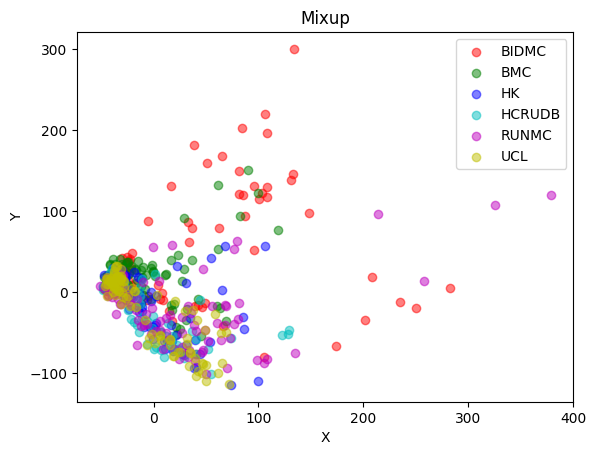

In [31]:
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
datasets = ['BIDMC','BMC', 'HK', 'HCRUDB', 'RUNMC', 'UCL']
import matplotlib.pyplot as plt
for i in range(0,6):
    plt.scatter(samples[i][:100,0], samples[i][:100,1], c=colors[i], label=datasets[i],alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mixup')
plt.legend()
plt.savefig("figs/mixup-mul.png")
plt.show()

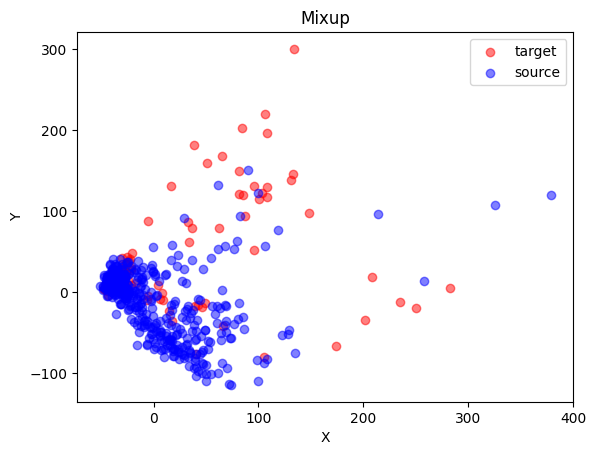

In [30]:
tgt = samples[0][:100]
src = np.concatenate([samples[i][:100] for i in range(1,6)], axis = 0)
import matplotlib.pyplot as plt
plt.scatter(tgt[:,0], tgt[:,1], c='r', label='target', alpha=0.5)
plt.scatter(src[:,0], src[:, 1], c='b', label='source', alpha=0.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Mixup')
plt.legend()
plt.savefig("figs/mixup-2.png")
plt.show()